In [1]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from tf_lab.fundamentals.utils import set_visible_GPUs
import tf_lab.point_clouds.in_out as pio
import tf_lab.models.point_net_based_AE as pnAE
from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id
from tf_lab.point_clouds.in_out import PointCloudDataSet
from tf_lab.point_clouds.point_net_ae import PointNetAutoEncoder
from tf_lab.point_clouds.autoencoder import Configuration as Conf
import tf_lab.point_clouds.various_encoders_decoders as enc_dec

from tf_lab.autopredictors.evaluate.basics import eval_model, read_saved_epochs
from tf_lab.autopredictors.plotting.basics import plot_original_pclouds_vs_reconstructed,\
                                                  plot_train_val_test_curves, plot_reconstructions_at_epoch


from general_tools.in_out.basics import create_dir, delete_files_in_directory, files_in_subdirs
from geo_tool import Point_Cloud

/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/geo_tool/solids/mesh.py:26: UserWarning: Mayavi library was not found. Some graphics utilities will be disabled.
  warnings.warn('Mayavi library was not found. Some graphics utilities will be disabled.')


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [31]:
seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
full_pclouds_path = osp.join(top_data_dir, 'ShapeNetPointClouds/from_manifold_meshes/1024/')

experiment_name = 'enc_filter_1_simple_decode_no_noise'
train_dir = osp.join(top_data_dir, 'OUT/models/vanilla_ae/full_SN')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

'/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/vanilla_ae/full_SN/enc_filter_1_simple_decode_no_noise'

In [4]:
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path)
full_pclouds, full_model_names, class_ids = pio.load_crude_point_clouds(file_names=full_file_names, n_threads=15)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

52103 files containing complete point clouds were found.


/orions4-zfs/projects/lins2/Panos_Space/Git_Repos/tf_lab/point_clouds/in_out.py:64: UserWarning: Point clouds with the same model name were loaded.
  warnings.warn('Point clouds with the same model name were loaded.')


In [30]:
train_data_, val_data_, test_data_ = pio.train_validate_test_split([full_pclouds,                                                            
                                                            full_model_names],
                                                            train_perc=0.8,
                                                            validate_perc=0.1,
                                                            test_perc=0.1,
                                                            seed=seed)

train_data = PointCloudDataSet(train_data_[0], labels=train_data_[1])
val_data = PointCloudDataSet(val_data_[0], labels=val_data_[1])
test_data = PointCloudDataSet(test_data_[0], labels=test_data_[1])

In [33]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

set_visible_GPUs([1])

conf = Conf(n_input = [1024, 3],
               training_epochs = 200,
               batch_size = 80,
               loss = 'Chamfer',
               train_dir = train_dir,
               loss_display_step = 1,
               saver_step = 5,
               learning_rate = 0.00002,
               saver_max_to_keep = 200,
               encoder = pnAE.encoder,
               decoder = enc_dec.decoder_only_with_fc
               )

reset_graph()
ae = PointNetAutoEncoder(experiment_name, conf)

In [34]:
ae.train(train_data, conf)

('Epoch:', '0001', 'training time (minutes)=', '1.3361', 'loss=', '0.005701190')
('Epoch:', '0002', 'training time (minutes)=', '1.3357', 'loss=', '0.002726582')
('Epoch:', '0003', 'training time (minutes)=', '1.3458', 'loss=', '0.002249806')
('Epoch:', '0004', 'training time (minutes)=', '1.3357', 'loss=', '0.002027126')
('Epoch:', '0005', 'training time (minutes)=', '1.3807', 'loss=', '0.001888713')
('Epoch:', '0006', 'training time (minutes)=', '1.3373', 'loss=', '0.001790229')
('Epoch:', '0007', 'training time (minutes)=', '1.3707', 'loss=', '0.001713586')
('Epoch:', '0008', 'training time (minutes)=', '1.3361', 'loss=', '0.001651078')
('Epoch:', '0009', 'training time (minutes)=', '1.3586', 'loss=', '0.001598515')
('Epoch:', '0010', 'training time (minutes)=', '1.3693', 'loss=', '0.001553467')
('Epoch:', '0011', 'training time (minutes)=', '1.3704', 'loss=', '0.001514216')
('Epoch:', '0012', 'training time (minutes)=', '1.3831', 'loss=', '0.001479853')
('Epoch:', '0013', 'training

[(1, 0.0057011904751778277, 80.16671681404114),
 (2, 0.0027265818820883755, 80.1449339389801),
 (3, 0.0022498063154111039, 80.74851584434509),
 (4, 0.0020271255811247367, 80.14495396614075),
 (5, 0.0018887128363651244, 82.84414005279541),
 (6, 0.0017902291441986948, 80.23630404472351),
 (7, 0.0017135861220692718, 82.2411470413208),
 (8, 0.0016510778188530263, 80.16310501098633),
 (9, 0.0015985153062669506, 81.51588010787964),
 (10, 0.0015534674344341237, 82.15586400032043),
 (11, 0.0015142156374721204, 82.22532296180725),
 (12, 0.0014798533553060953, 82.98876595497131),
 (13, 0.0014486660353657066, 82.17193603515625),
 (14, 0.0014208984427643858, 80.83867383003235),
 (15, 0.0013958380370795898, 83.798672914505),
 (16, 0.0013732591989376866, 81.68213105201721),
 (17, 0.0013531991995642258, 84.55673408508301),
 (18, 0.0013340876132496517, 81.58544206619263),
 (19, 0.001316622251085222, 83.9515950679779),
 (20, 0.0013006380966984292, 81.48245811462402),
 (21, 0.0012857637677838644, 85.336

In [12]:
saved_epochs = read_saved_epochs(conf.train_dir)
epochs = saved_epochs[::len(saved_epochs)/10]
stats = eval_model(ae, conf, [train_data, test_data, val_data], epochs=epochs, verbose=True)

Model restored in epoch 5.
[ 0.00207236  0.00206381  0.0020587 ]
Model restored in epoch 105.
[ 0.00133248  0.00134782  0.00134744]
Model restored in epoch 205.
[ 0.00123548  0.0012542   0.00125345]
Model restored in epoch 305.
[ 0.00118832  0.00120968  0.00120962]
Model restored in epoch 405.
[ 0.00116001  0.00118209  0.0011806 ]
Model restored in epoch 505.
[ 0.00114046  0.00116347  0.00116377]
Model restored in epoch 605.
[ 0.00112597  0.00114997  0.00114977]
Model restored in epoch 705.
[ 0.00111522  0.00113998  0.00114075]
Model restored in epoch 805.
[ 0.00110638  0.00113268  0.00113281]
Model restored in epoch 905.
[ 0.00109887  0.00112606  0.00112581]


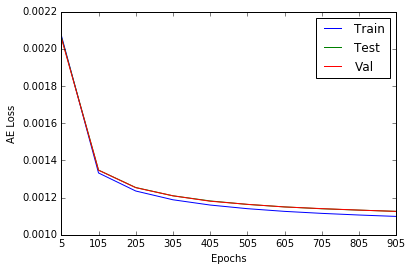

In [14]:
top_save_dir = osp.join(top_data_dir, 'OUT/model_evaluation/vanilla_ae/full_sn', experiment_name)
plot_train_val_test_curves(stats, top_save_dir, has_validation=True, best_epoch=None, show=True)

In [17]:
last_epoch = saved_epochs[-1]
save_dir = osp.join(top_save_dir, 'train_images_epoch_' + str(last_epoch))
plot_reconstructions_at_epoch(last_epoch, ae, train_data, conf, save_dir=save_dir, max_plot=250)

save_dir = osp.join(top_save_dir, 'test_images_epoch_' + str(last_epoch))
plot_reconstructions_at_epoch(last_epoch, ae, test_data, conf, save_dir=save_dir, max_plot=250)